In [1]:
#SVD - Singular Value Decomposition
# https://towardsdatascience.com/singular-value-decomposition-example-in-python-dab2507d85a0

In [4]:
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
from sklearn.decomposition import TruncatedSVD
import numpy as np
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
from sklearn.ensemble import RandomForestClassifier


In [5]:
X, y = load_digits(return_X_y=True)

In [6]:
X.shape

(1797, 64)

In [7]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [8]:
image = X[0]
image

array([0.00, 0.00, 5.00, 13.00, 9.00, 1.00, 0.00, 0.00, 0.00, 0.00, 13.00,
       15.00, 10.00, 15.00, 5.00, 0.00, 0.00, 3.00, 15.00, 2.00, 0.00,
       11.00, 8.00, 0.00, 0.00, 4.00, 12.00, 0.00, 0.00, 8.00, 8.00, 0.00,
       0.00, 5.00, 8.00, 0.00, 0.00, 9.00, 8.00, 0.00, 0.00, 4.00, 11.00,
       0.00, 1.00, 12.00, 7.00, 0.00, 0.00, 2.00, 14.00, 5.00, 10.00,
       12.00, 0.00, 0.00, 0.00, 0.00, 6.00, 13.00, 10.00, 0.00, 0.00,
       0.00])

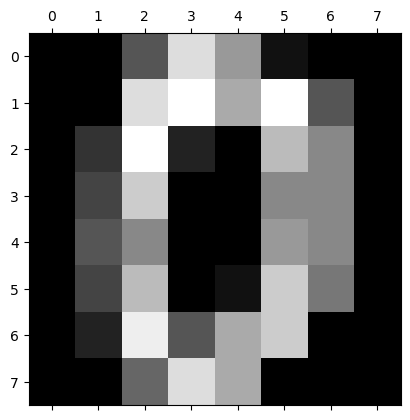

In [9]:
image = image.reshape((8, 8))
plt.matshow(image, cmap = 'gray')

In [10]:
U, s, V = np.linalg.svd(image)
S = np.zeros((image.shape[0], image.shape[1]))
S[:image.shape[0], :image.shape[0]] = np.diag(s)
n_component = 2
S = S[:, :n_component]
VT = V[:n_component, :]
A = U.dot(S.dot(VT))
print(A)

[[0.00 -1.10 4.74 12.16 9.52 2.44 -1.33 0.00]
 [0.00 1.81 15.31 13.79 11.23 12.27 4.48 0.00]
 [0.00 3.86 13.36 1.19 1.49 12.59 7.65 0.00]
 [0.00 3.39 10.76 -0.35 0.20 10.36 6.61 0.00]
 [0.00 3.11 9.52 -0.85 -0.24 9.26 6.04 0.00]
 [0.00 3.61 11.79 0.12 0.60 11.27 7.07 0.00]
 [0.00 2.08 12.63 8.58 7.13 10.60 4.66 0.00]
 [0.00 -1.18 4.88 12.71 9.96 2.47 -1.44 0.00]]


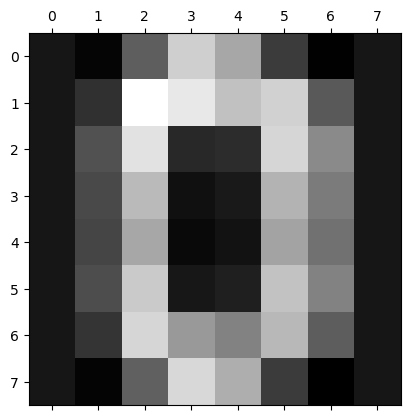

In [11]:
plt.matshow(A, cmap = 'gray')

In [12]:
U.dot(S)

array([[10.97, -12.23],
       [26.04, -6.82],
       [18.73, 7.95],
       [14.60, 8.08],
       [12.72, 7.84],
       [16.19, 8.21],
       [20.45, -2.05],
       [11.36, -12.85]])

In [13]:
rf_original = RandomForestClassifier(oob_score=True)
rf_original.fit(X, y)

RandomForestClassifier(oob_score=True)

In [14]:
rf_original.oob_score_

0.9782971619365609

In [15]:
svd = TruncatedSVD(n_components=2)
X_reduced = svd.fit_transform(X)

In [16]:
X_reduced[0]

array([45.86, -1.19])

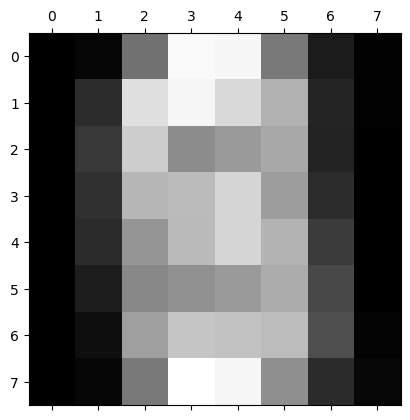

In [17]:
image_reduced = svd.inverse_transform(X_reduced[0].reshape(1,-1))
image_reduced = image_reduced.reshape((8,8))
plt.matshow(image_reduced, cmap = 'gray')

In [18]:
rf_reduced = RandomForestClassifier(oob_score=True)
rf_reduced.fit(X_reduced, y)
rf_reduced.oob_score_

0.39565943238731216

In [32]:
svd.explained_variance_ratio_.sum()

0.17760900855266876

In [33]:
svd = TruncatedSVD(n_components=16)
X_reduced = svd.fit_transform(X)
svd.explained_variance_ratio_.sum()


0.8479577686600934

In [34]:
rf_reduced = RandomForestClassifier(oob_score=True)
rf_reduced.fit(X_reduced, y)
rf_reduced.oob_score_

0.9616026711185309